Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [286]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';', stringsAsFactors = T)
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [287]:
interestedColumns = c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')
interestedDS = subset(airbnb, select = interestedColumns)
head(interestedDS)

City   Room.Type       Neighbourhood              Accommodates Bathrooms
1 London Entire home/apt                            1            1.0      
2 London Entire home/apt LB of Richmond upon Thames 8            2.5      
3 London Entire home/apt                            2            1.0      
4 Madrid Private room    Palacio                    2            1.0      
5 Madrid Entire home/apt Palacio                    2            1.0      
6 Madrid Private room    La Latina                  2            1.0      
  Bedrooms Beds Price Square.Feet Guests.Included Extra.People
1 1        1     50    NA         1               20          
2 5        5    175    NA         6               25          
3 1        1    155    NA         1                0          
4 1        1     36    NA         1                0          
5 1        1     85    NA         1                0          
6 1        1     20   861         1               10          
  Review.Scores.Rating Latitude Longitude 
1 90                   51.49247 -0.1886284
2 87                   51.48200 -0.2392775
3 NA                   51.51579 -0.1363321
4 98                   40.41011 -3.7147540
5 95                   40.41697 -3.7094389
6 91                   40.40971 -3.7135612

Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [288]:

newInterestedColumns = c('Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')
df1 = interestedDS[which(interestedDS$City=="Madrid" ) ,]
df2 = df1[which(df1$Room.Type=="Entire home/apt" ) ,]
df3= df2[which(df2$Neighbourhood != "") ,]
df_madrid = subset(df3, select = newInterestedColumns)
summary(df_madrid)



     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 10.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 237.0   Median : 2.000  
 Mean   : 2.393   Mean   : 88.74   Mean   : 392.6   Mean   : 1.952  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [290]:
pieAmetros = 0.092903
df_madrid$Square.Meters = as.numeric(df_madrid$Square.Feet) * pieAmetros
head(df_madrid)

Neighbourhood Accommodates Bathrooms Bedrooms Beds Price Square.Feet
5  Palacio       2             1        1         1    85   NA         
7  Malasaña      4             1        1         2   112   NA         
8  Palacio       8             3        3         4   190   NA         
12 La Latina     2             1        1         1    71   NA         
14 Embajadores   2            NA        1        NA    34   NA         
15 Embajadores   3             1        0         2    60   NA         
   Guests.Included Extra.People Review.Scores.Rating Latitude Longitude
5  1                0            95                  40.41697 -3.709439
7  2                5            99                  40.42319 -3.711249
8  6               40            96                  40.41651 -3.717843
12 1                0            90                  40.41200 -3.706691
14 1                6            88                  40.40809 -3.700322
15 1                0           100                  40.41085 -3.701099
   Square.Meters
5  NA           
7  NA           
8  NA           
12 NA           
14 NA           
15 NA

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [291]:
squareMetersConNA = sum(is.na(df_madrid$Square.Meters))
totalFilas = nrow(df_madrid)
porcentajeAptNA = (squareMetersConNA/totalFilas) * 100

paste("El porcentaje de Aptos que no muestran m² es de" , porcentajeAptNA , "%")


[1] "El porcentaje de Aptos que no muestran m² es de 93.8046777361185 %"

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [292]:
squereMeters0 = sum(df_madrid$Square.Meters == 0 , na.rm=T)
squareMetersSinNA = sum(!is.na(df_madrid$Square.Meters))
porcentajeApto0difNA = (squereMeters0 / squareMetersSinNA)*100

squereMeters0
paste("El porcentaje de Aptos con m²  igual a 0 de los que no tienen NA es de " , porcentajeApto0difNA , "%")



[1] 128

[1] "El porcentaje de Aptos con m²  igual a 0 de los que no tienen NA es de  36.8876080691643 %"

Reemplazar todos los 0m^2 por NA 

In [293]:
df_madrid$Square.Meters[df_madrid$Square.Meters == 0 ] <- NA
#sum(df_madrid$Square.Meters == 0 , na.rm=T)

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero antes de eso deberíamos pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más, además crearemos una variable sintética nueva basada en la similitud entre barrios.

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [294]:

#sum(df_madrid$Square.Meters < 20 , na.rm=T)  #-- 45 existian
df_madrid$Square.Meters[df_madrid$Square.Meters < 20 ] <- NA
#sum(df_madrid$Square.Meters < 20 , na.rm=T)  #-- 0 existen


Existen varios Barrios que todas sus entradas son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [295]:
colNames = colnames(df_madrid)
colNamesLength = length(colNames)
df_madridConNulls=df_madrid
for (i in 1:colNamesLength){  
    df_madrid = df_madrid[which(!is.na(df_madrid[,colNames[i] ])) ,]
    #print(colNames[i])
}
neightbourhoodUniqueslength = length(unique(df_madrid$Neighbourhood))
paste("Quedan un total de  ",neightbourhoodUniqueslength,"barrios")

[1] "Quedan un total de   37 barrios"

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

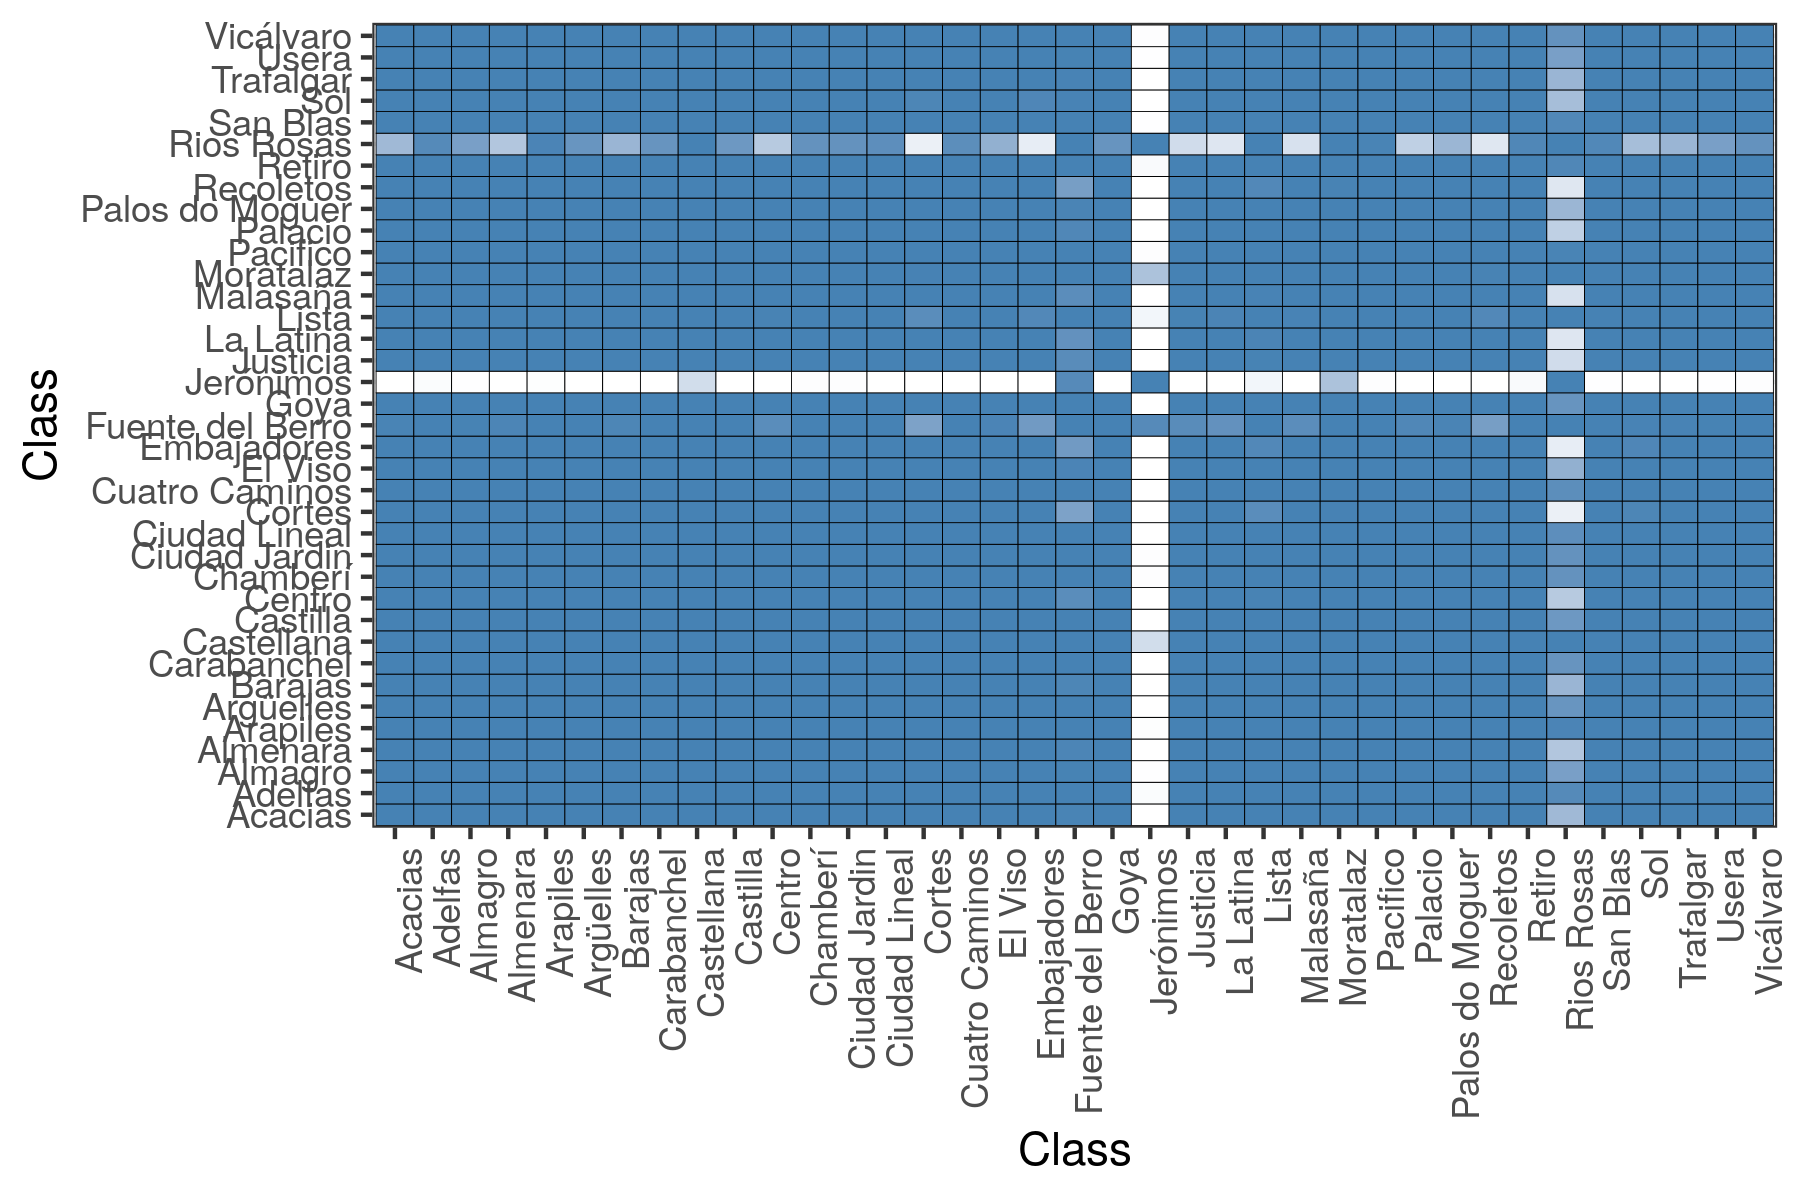

In [296]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


In [297]:
distribution = as.dist(1-resm)
hc = hclust(distribution,method="complete")
hcd = as.dendrogram(hc)

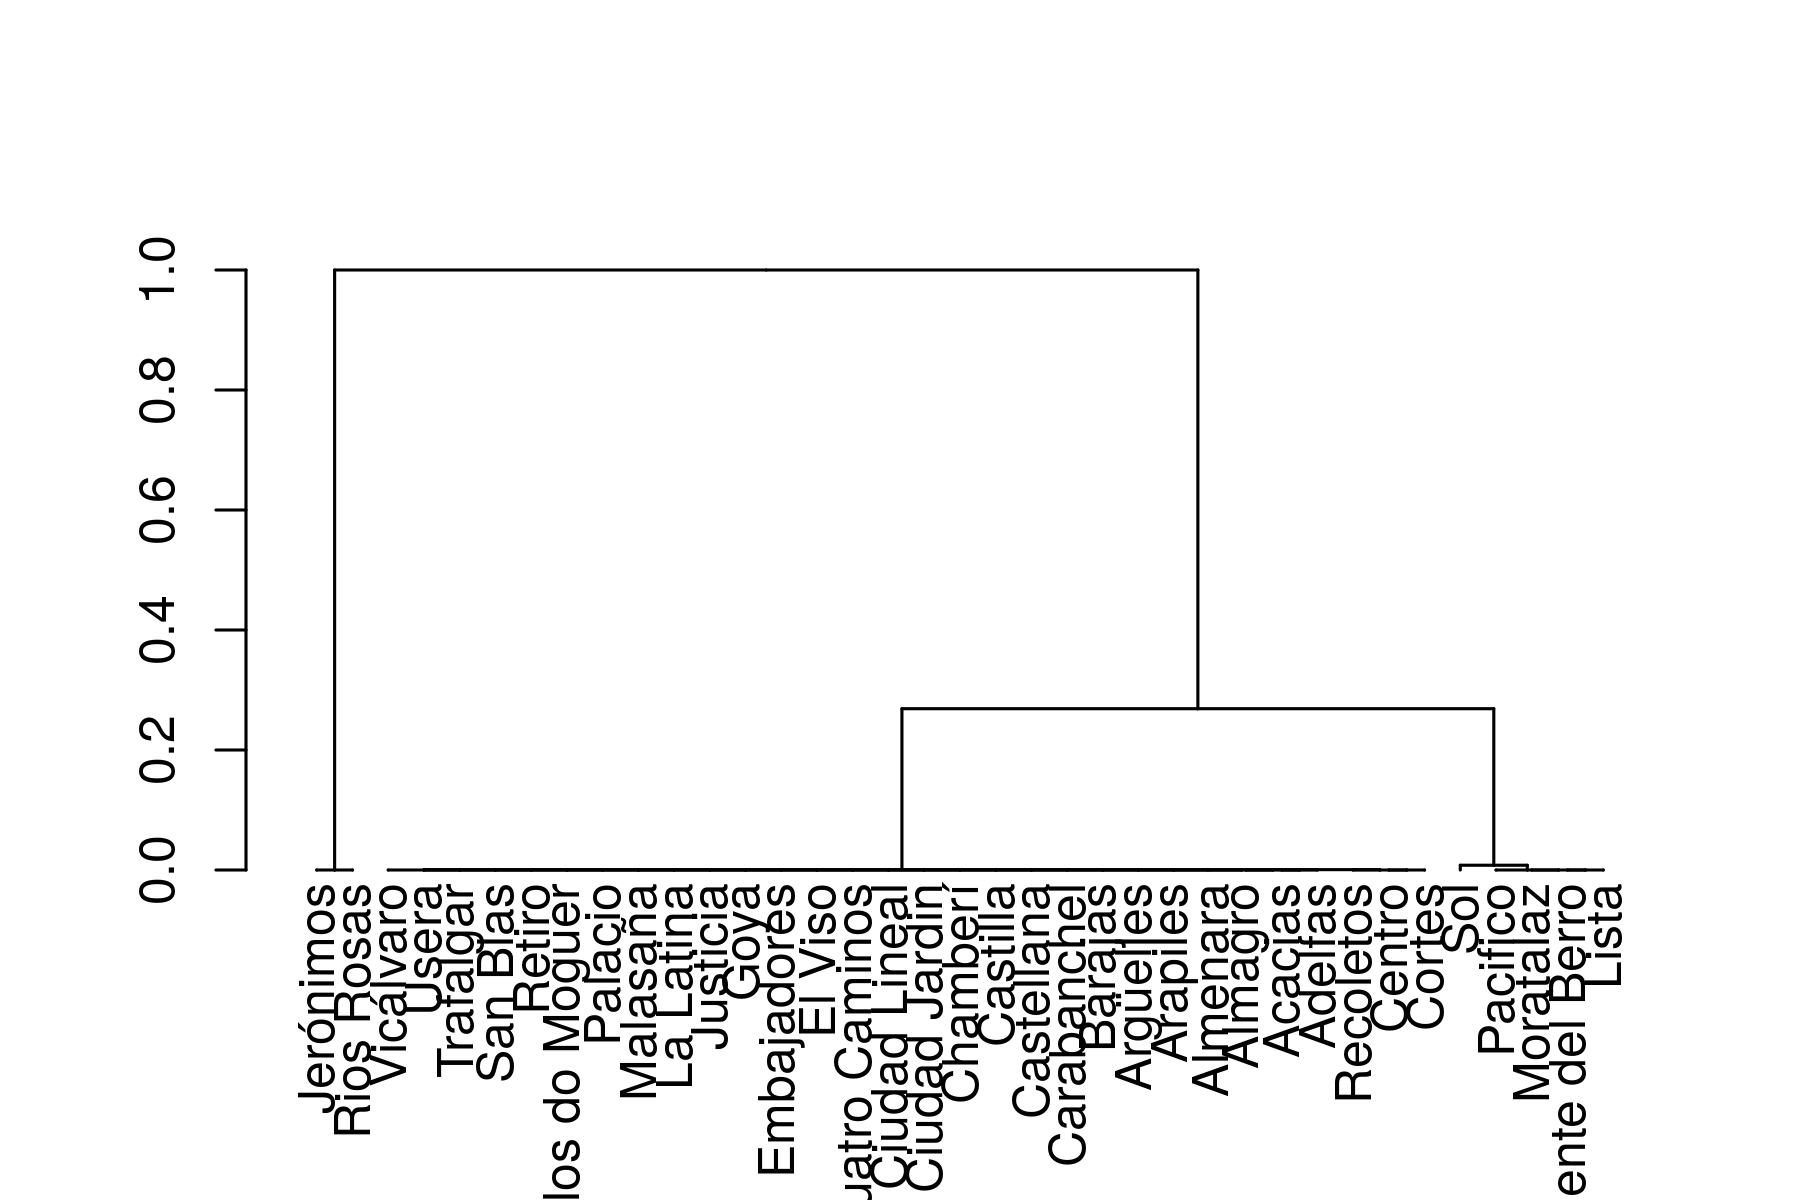

In [298]:
plot(hcd)

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

[1] "El corte mas aconsejable es en 0.2"


Acacias          Adelfas          Almagro         Almenara 
               1                1                1                1 
        Arapiles        Argüelles          Barajas      Carabanchel 
               1                1                1                1 
      Castellana         Castilla           Centro         Chamberí 
               1                1                1                1 
   Ciudad Jardin    Ciudad Lineal           Cortes   Cuatro Caminos 
               1                1                1                1 
         El Viso      Embajadores Fuente del Berro             Goya 
               1                1                2                1 
       Jerónimos         Justicia        La Latina            Lista 
               3                1                1                2 
        Malasaña        Moratalaz         Pacifico          Palacio 
               1                2                2                1 
 Palos do Moguer        Recoletos           Retiro       Rios Rosas 
               1                1                1                3 
        San Blas              Sol        Trafalgar            Usera 
               1                2                1                1 
       Vicálvaro 
               1

[1] "aparecen un total de 3 clusters"


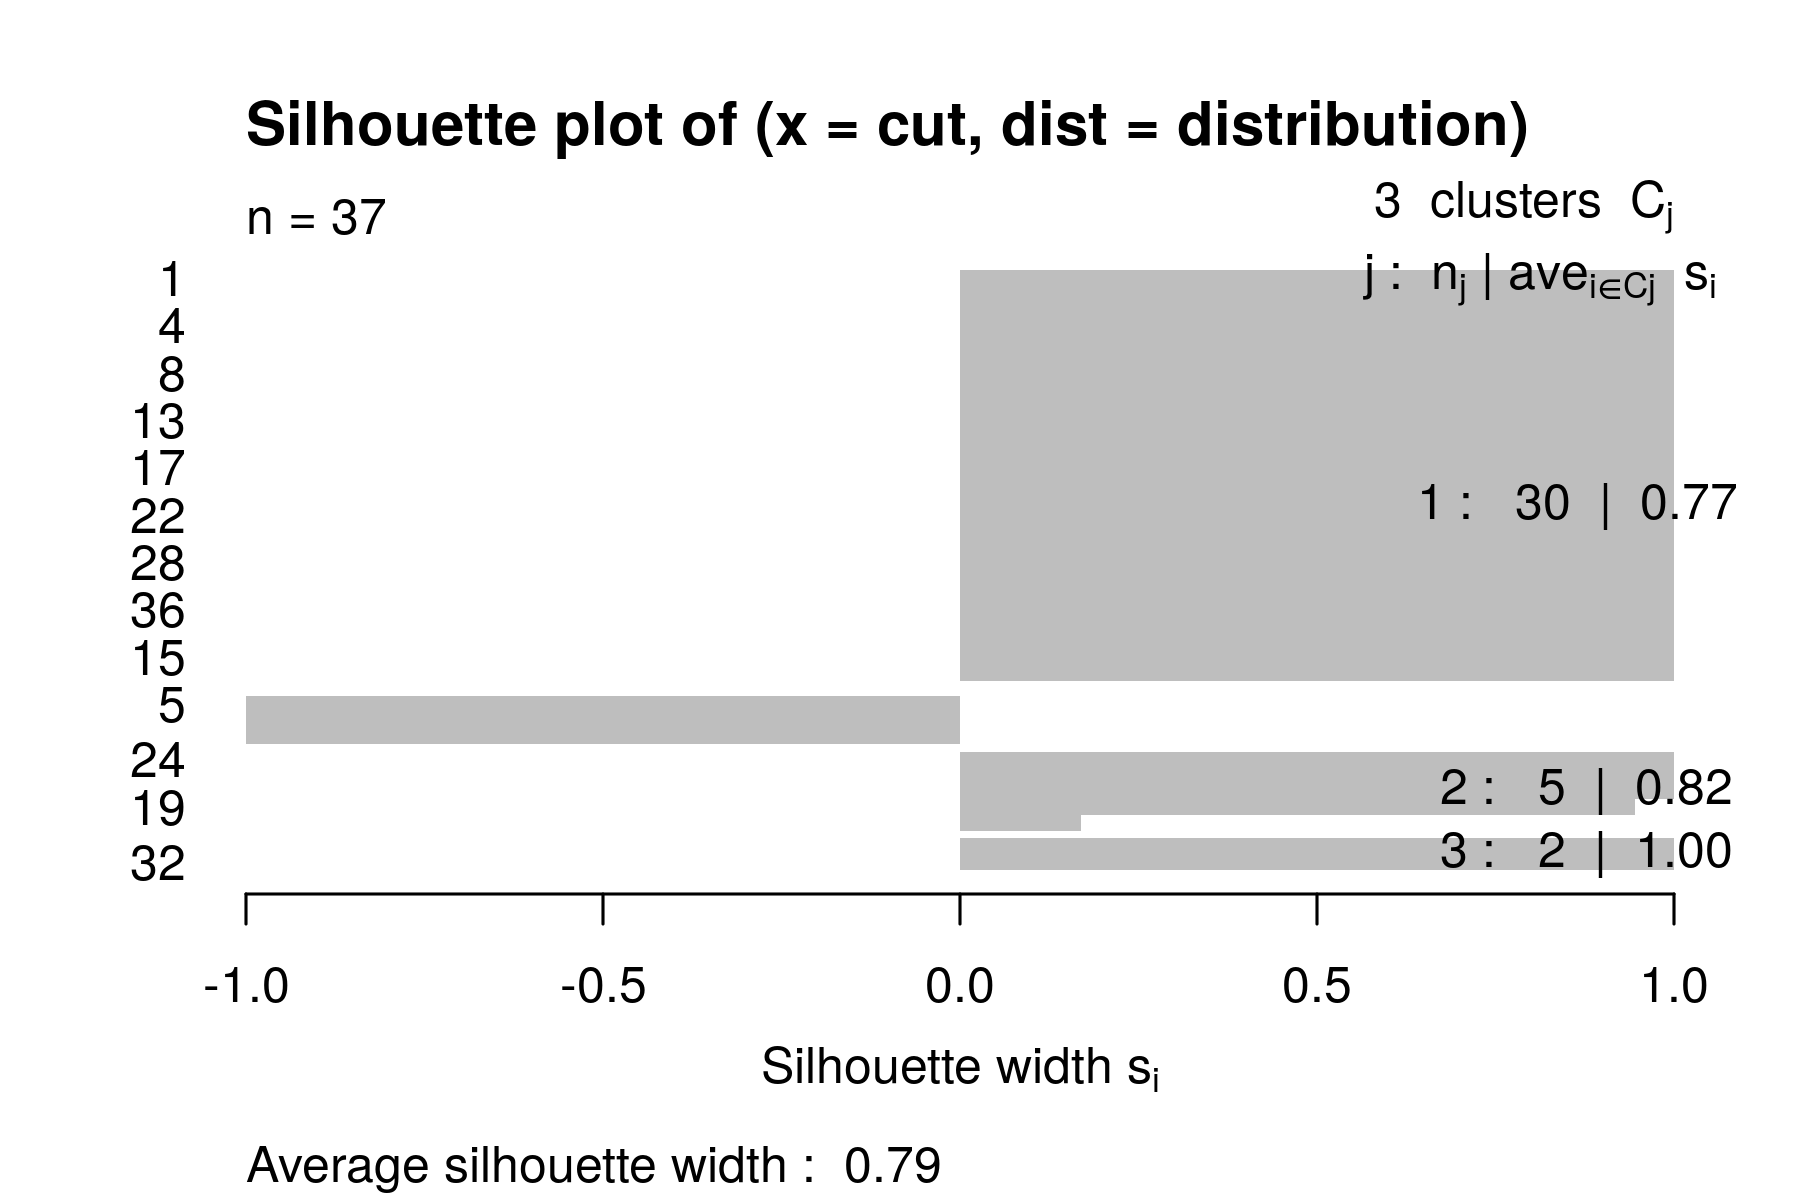

In [299]:
print("El corte mas aconsejable es en 0.2")
cut<-cutree(hc,h=0.2)
cut

sil<-silhouette(cut,distribution)
plot(sil,border=NA)
print("aparecen un total de 3 clusters")

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [300]:
cutDF<-data.frame(names=names(cut),neighb_id=paste0("Neighb_id_",cut))
df_madrid = merge(df_madrid,cutDF,by.x = "Neighbourhood",by.y='names' )
head(df_madrid)
dim(df_madrid) 


Neighbourhood Accommodates Bathrooms Bedrooms Beds Price Square.Feet
1 Acacias       4            1.0       1        2    60    538        
2 Acacias       4            1.0       1        3    68    807        
3 Acacias       4            1.0       1        2    60    753        
4 Adelfas       6            1.5       2        6    60    753        
5 Almagro       4            1.0       1        2    75    538        
6 Almenara      4            1.0       0        1    52    484        
  Guests.Included Extra.People Review.Scores.Rating Latitude Longitude
1 2               15           98                   40.40513 -3.707726
2 2               10           90                   40.39691 -3.705202
3 2               12           85                   40.40073 -3.706203
4 2               15           94                   40.39912 -3.670071
5 2               10           92                   40.43825 -3.693876
6 2                0           72                   40.47221 -3.693440
  Square.Meters neighb_id  
1 49.98181      Neighb_id_1
2 74.97272      Neighb_id_1
3 69.95596      Neighb_id_1
4 69.95596      Neighb_id_1
5 49.98181      Neighb_id_1
6 44.96505      Neighb_id_1

[1] 165  14

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [301]:
set.seed(12)
idx=sample(1:nrow(df_madrid),nrow(df_madrid)*0.8)
dfMadridIdTrain=df_madrid[idx,]
dfMadridIdTest=df_madrid[-idx,]

In [302]:
model=lm(formula=Square.Meters~neighb_id+neighb_id+Price+Bedrooms, dfMadridIdTrain)
summary(model)


Call:
lm(formula = Square.Meters ~ neighb_id + neighb_id + Price + 
    Bedrooms, data = dfMadridIdTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.975 -12.771   0.091   8.407  84.411 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          22.18564    3.48423   6.367 3.21e-09 ***
neighb_idNeighb_id_2  7.46568    4.32747   1.725 0.086927 .  
neighb_idNeighb_id_3 70.75021   20.78550   3.404 0.000890 ***
Price                 0.11014    0.03159   3.487 0.000672 ***
Bedrooms             21.34682    2.12651  10.038  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.12 on 127 degrees of freedom
Multiple R-squared:  0.6785,	Adjusted R-squared:  0.6684 
F-statistic: 67.01 on 4 and 127 DF,  p-value: < 2.2e-16


In [303]:
print("Comprobamos si tenemos overfitting:")
caret::postResample(predict(model,dfMadridIdTrain),obs = dfMadridIdTrain$Square.Meters)
caret::postResample(predict(model,dfMadridIdTest),obs = dfMadridIdTest$Square.Meters)

[1] "Comprobamos si tenemos overfitting:"


RMSE   Rsquared        MAE 
19.7322408  0.6785094 14.4906735

RMSE   Rsquared        MAE 
47.7898830  0.7467344 23.7328209

[1] "Podemos observar un outlier que se pudiese tratar"


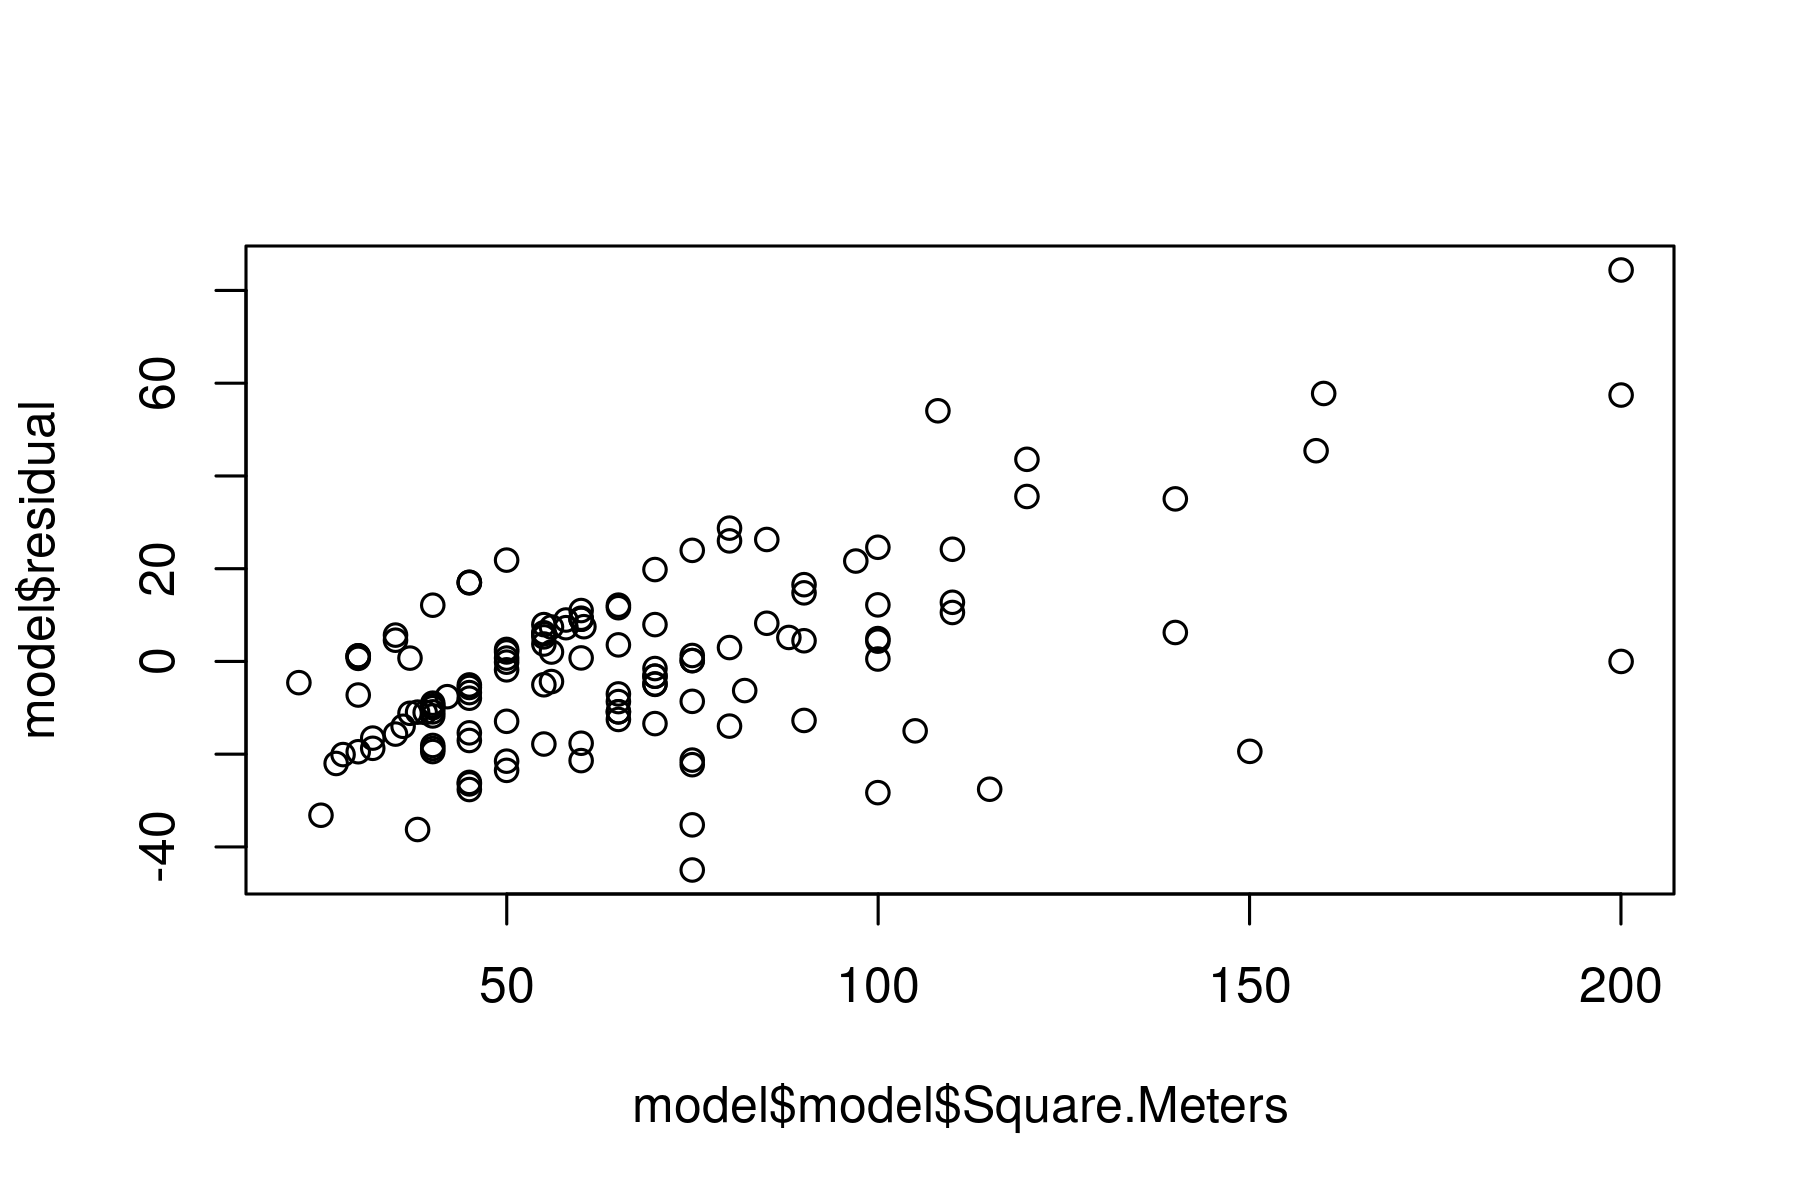

In [304]:
plot(model$model$Square.Meters,model$residual)
print("Podemos observar un outlier que se pudiese tratar")

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

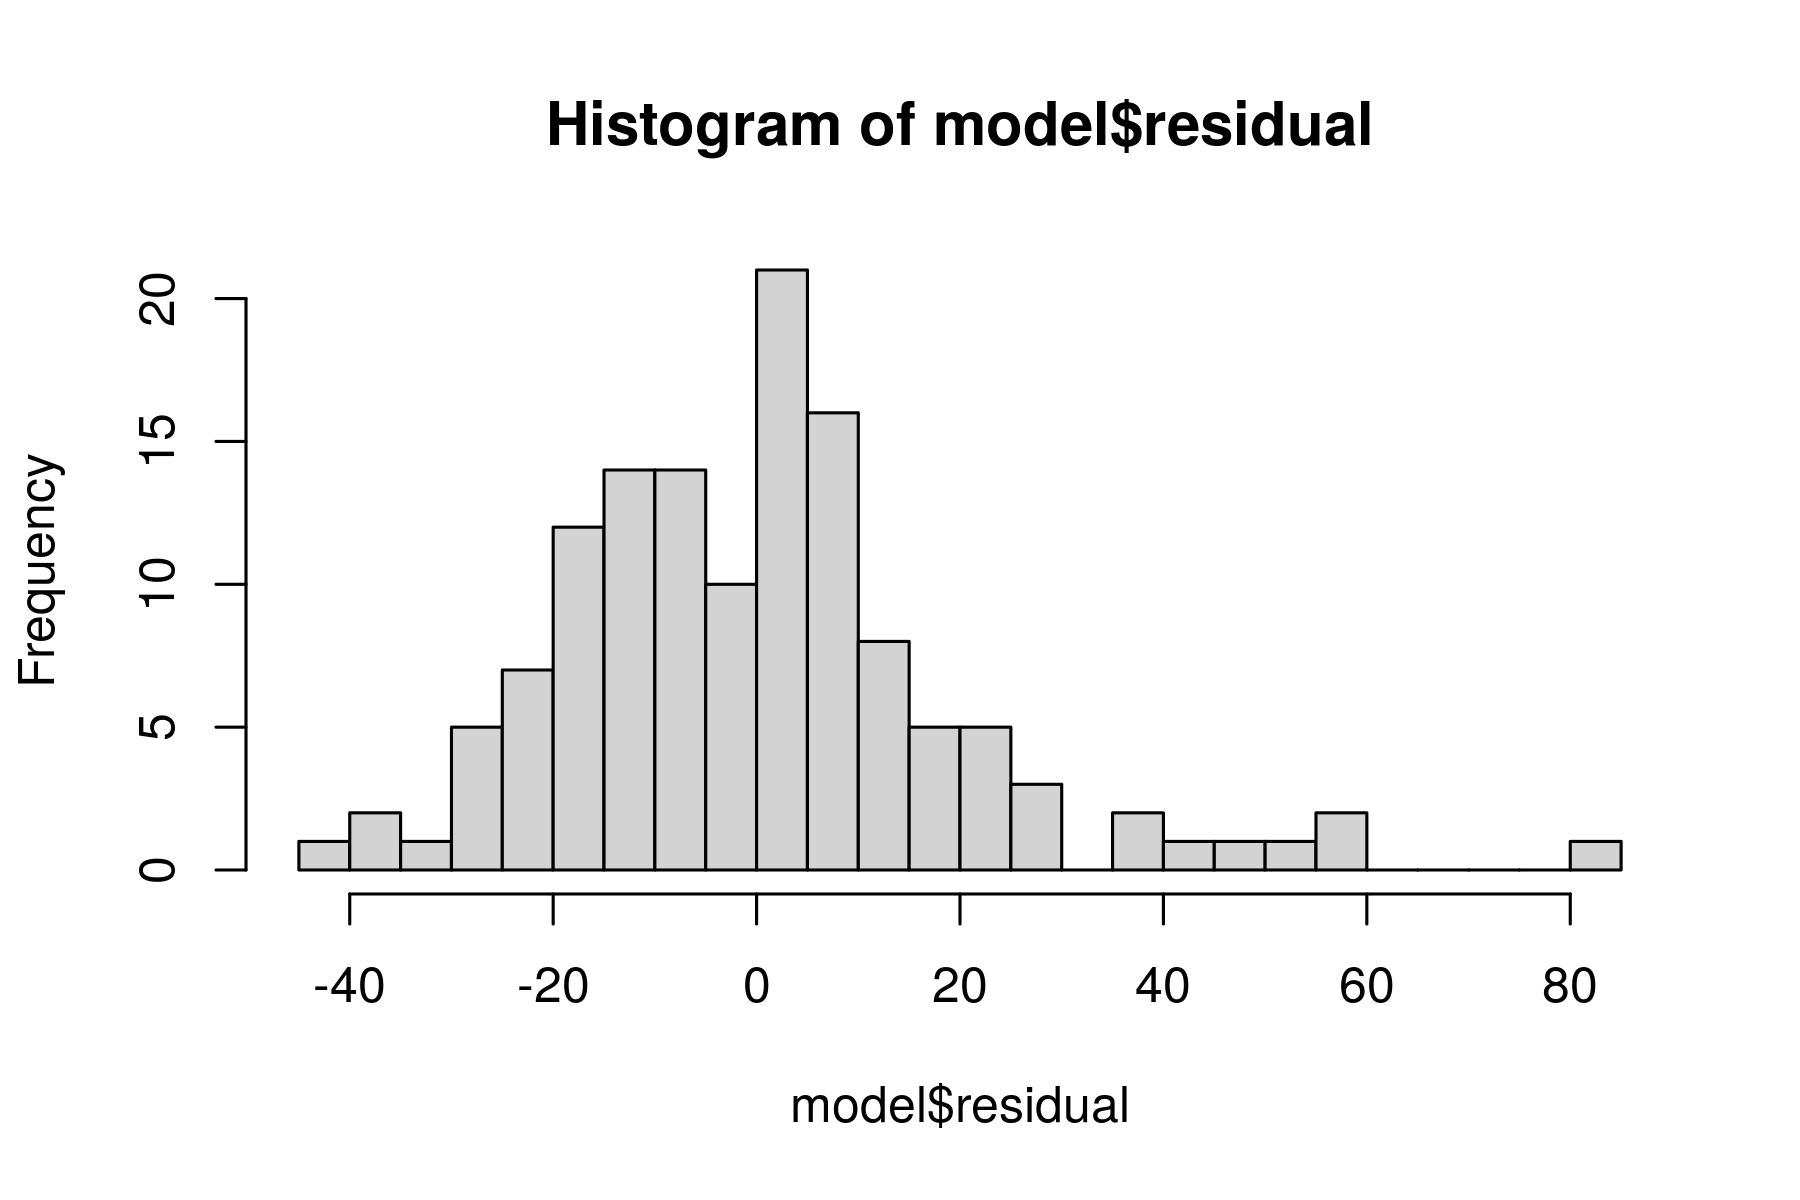

In [305]:
hist(model$residual,breaks=30)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates) con un precio de 80€/noche y 3 habitaciones en el barrio de Sol.
¿Cuantos metros cuadrados tendría?
¿Como varía sus metros cuadrados con cada habitación adicional?

In [306]:
neighbSol = cutDF[which(names =="Sol") ,]
neighbSolID = neighbSol$neighb_id
paste("El id del barrio es",neighbSolID)
dfApartment = data.frame(neighb_id=neighbSolID,Bedrooms=3,Price=80,Accommodates=6)
pred_m2 = predict(model,dfApartment)
paste("El apartamento tendria :",round(pred_m2), "metros cuadrados")
cf = coefficients(model)
cfBedSol = cf['Bedrooms']
paste("La variacion es de aproximadamente",round(cfBedSol,2),"m² con cada habitacion adicional")


[1] "El id del barrio es Neighb_id_2"

[1] "El apartamento tendria : 103 metros cuadrados"

[1] "La variacion es de aproximadamente 21.35 m² con cada habitacion adicional"

In [312]:
#df_madridConNulls

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [317]:
#dfMadridARellenar <- df_madridConNulls %>% inner_join(cutDF,by=c("Neighbourhood"='names'))
#head(df_madridConNulls)
dfMadridARellenar = merge(df_madridConNulls,cutDF,by.x = "Neighbourhood",by.y='names' )

dfMadridARellenar$Square.Meters[is.na(dfMadridARellenar$Square.Meters)]=round(predict(model,dfMadridARellenar[is.na(dfMadridARellenar$Square.Meters),]))


#head(dfMadridARellenar)

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [356]:
# Solo se usan numeros con prcomp asi que ...
dfMadridPCA = na.omit(dfMadridARellenar[,c("Accommodates","Bathrooms","Bedrooms","Latitude","Longitude","Beds","Price","Review.Scores.Rating","Square.Meters")])
dfPCA = prcomp(dfMadridPCA,center = TRUE, scale. = TRUE)
#dfPCA

#Declaramos la funcion
apartamentoMasCercano<-function(dfPCA, datosApto){
    pca_new<-predict(dfPCA,newdata = datosApto)
    pca_orig<-dfPCA$x[,1:2]
    pca_new <-pca_new[,1:2]

    idx<-order(rowSums((pca_new-pca_orig)^2))
    dfMadridPCA[idx %in% 1:5,]}

In [367]:
x=10
for(i in 1:3) {
    x=x+270
    toPrint = paste("Los 5 apartamento mas similares al de la posicion",x,"son:")
    print(toPrint)
    datosApto = dfMadridPCA[x,]
    print(apartamentoMasCercano(dfPCA,datosApto))
}

[1] "Los 5 apartamento mas similares al de la posicion 280 son:"
     Accommodates Bathrooms Bedrooms Latitude Longitude Beds Price
866             3         2        2 40.41314 -3.698658    2   110
1947            2         1        0 40.42270 -3.696645    1    50
3158            4         1        1 40.42783 -3.705981    2    60
3780            3         1        0 40.42151 -3.712165    2    60
4247            4         1        1 40.41812 -3.700462    3    59
     Review.Scores.Rating Square.Meters
866                    96            77
1947                   94            28
3158                   60            50
3780                   97            29
4247                   85            57
[1] "Los 5 apartamento mas similares al de la posicion 550 son:"
     Accommodates Bathrooms Bedrooms Latitude Longitude Beds Price
219             6       2.0        3 40.43831 -3.710798    3   130
1161            5       1.0        2 40.40825 -3.699825    2    55
1570            3       1.0

Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?